# Working with Survey123 in the ArcGIS API for Python

#### Do you like asking people stuff? Do you also like mapping? And automating things? 

Then by golly, do we have the module for you. For any of you that aren't familiar, Survey123 is a very handy application that allows you to create surveys with spatial capabilities. The surveys are clean-looking, easy to design, and have a UX similar to other popular online form applications, except they're built to be compatible with the ArcGIS world. With them, you can do things such as collect spatial data (that gets fed directly to your AGOL/Enterprise portal), embed maps in questions, visualize results in charts and Dashboards, and much more.

The ArcGIS API for Python provides a great tool for working with these surveys: the ability to manage them and their data without having to click through a portal or the GUI. This can save an immense amount of time for organizations that, for example, may be collecting mass amounts of data or deploying a ton of different Surveys. Let's jump in and take a look at what we can do.

## The `SurveyManager` Module

First off, before we jump into the actual `Survey` module, we'll take a look at the `SurveyManager` module. The `SurveyManager` module is a very basic module that allows you to quickly get all of your forms or return a `Survey` object of one specific form. Let's first take a look at a Survey in our portal, and then see how we can grab it using this module.

In [1]:
# we'll start with importing everything and establishing a GIS connection
from arcgis.gis import GIS
from arcgis.apps.survey123 import SurveyManager
gis = GIS(profile = "your_online_profile")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
sm = SurveyManager(gis)
sm

< SurveyManager @ https://geosaurus.maps.arcgis.com >

Calling `SurveyManager.surveys` will list all of the published forms owned by the user account that the `GIS` object connection uses. The list will be comprised of `Survey` objects.

If you want to expand your search beyond the user account, you can use `gis.content.search()` and specify the item type `Form`. However, that list will be comprised of `Item` objects.

In [3]:
survey_list = sm.surveys
survey_list

[<Survey @ map q clone test>,
 <Survey @ Pre-course survey>,
 <Survey @ Special Event Permit>,
 <Survey @ San Diego Parrot Sightings>]

We can work directly with one of these objects, or we can use `SurveyManager.get()` with a specific item ID or `Item` to create a survey object. We'll get the item ID for the form we want to work with.

In [4]:
# we can work directly with one of these Survey objects
parrot_form = sm.get("02d0702e1ef0468083f780791670c969")
parrot_form

<Survey @ San Diego Parrot Sightings>

Now that we have our `Survey` object, let's see what we can do with it.

## The `Survey` Module

Now, one of the best things about the ArcGIS API for Python is it makes working with data easier. And, the name of the game with Survey123 is collecting data- being able to quickly download, manipulate, and analyze this data is a huge plus for Survey123 workflows. There are more advanced Survey123 demos and guides available both at this conference and online, so we're just going to go over a couple basic ways to work with your form data through the Python API.

We'll give a brief overview of the class's available functions first before diving in to some of the things we can do with the data.

In [5]:
parrot_form.properties

{'id': '02d0702e1ef0468083f780791670c969',
 'owner': 'nparavicini_geosaurus',
 'orgId': 'JEwYeAy2cc8qOe3o',
 'created': 1709758330000,
 'isOrgItem': True,
 'modified': 1710376420000,
 'guid': None,
 'name': '02d0702e1ef0468083f780791670c969.zip',
 'title': 'San Diego Parrot Sightings',
 'type': 'Form',
 'typeKeywords': ['Form', 'Survey123', 'Survey123 Hub', 'xForm'],
 'description': None,
 'tags': ['Survey123',
  'Natural Resources',
  'Petroleum and Pipeline',
  'Sustainable Development'],
 'snippet': 'Use this form to report sightings of parrots in San Diego.',
 'thumbnail': 'thumbnail/ago_downloaded.png',
 'documentation': None,
 'extent': [],
 'categories': [],
 'spatialReference': None,
 'accessInformation': None,
 'classification': None,
 'licenseInfo': None,
 'culture': 'en-us',
 'properties': {'versionInfo': {'created': {'build': '3.19.225',
    'timestamp': 1709758341117,
    'env': 'prod'},
   'saved': {'build': '3.19.225', 'timestamp': 1709790914618, 'env': 'prod'},
   'publ

Let's take a look at how we can take a Survey123 and automate creation of a report for it. This is extremely helpful for organizations that may be creating numerous new Surveys and want a way to display their data, or have predefined report templates that they want to apply to newly created forms.

Let's start from scratch- pretend we don't have any templates we want to use, and want to make a basic new one to display 

In [6]:
# first, check for existent templates. None should be here
parrot_form.report_templates

[]

In [7]:
# let's create one template of each type
template_folder = "/Folders/DevSummit2024/ReportTemplates"
parrot_form.create_report_template("individual", "individual_temp", template_folder)
parrot_form.create_report_template("summary", "summary_temp", template_folder)
parrot_form.create_report_template("summaryIndividual", "summary_individual_temp", template_folder)

'/Users/cowboy/Workspace/DevSummit2024/ReportTemplates/summary_individual_temp.docx'

In [8]:
# and now add these report templates to our form item
temp_names = ["individual_temp", "summary_temp", "summary_individual_temp"]
for name in temp_names:
    temp_path = template_folder + "/" + name + ".docx"
    parrot_form.upload_report_template(temp_path, name)

In [9]:
parrot_form.report_templates

[<Item title:"summary_individual_temp" type:Microsoft Word owner:nparavicini_geosaurus>,
 <Item title:"individual_temp" type:Microsoft Word owner:nparavicini_geosaurus>,
 <Item title:"summary_temp" type:Microsoft Word owner:nparavicini_geosaurus>]

Now that we've generated these report templates and uploaded them to our item, let's create a report and see what it looks like! We can generate these reports in a few different file formats and either download them to our local machine or store them in our portal. We're going to make a PDF one and store it in our AGOL organization for later use.

In [10]:
template = parrot_form.report_templates[0]

<Item title:"Test Parrot Report_20240314010808" type:PDF owner:nparavicini_geosaurus>
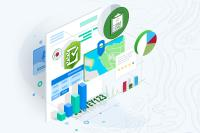

In [11]:
parrot_form.generate_report(report_template = template,
                           report_title = "Test Parrot Report",
                           output_format = "pdf",
                           folder_id = "9a77df0bb1c54903aeca1523fead027a", 
                           merge_files = "continuous")

Obviously, if you were somebody deploying in-depth Surveys and not just some kid in San Diego being bothered by parrots, then you'll probably make your reports a bit more specific than that. But, you get the point.

Finally, we're going to take a look at how you can easily port your data to every Jupyter Notebook user's favorite data structure: a Pandas DataFrame. Doing this is an extremely useful workflow, as the ArcGIS API for Python has tons of ways to work with DataFrame data; we even have our own namespace for DataFrames that allows easy work with spatial data (look into the Spatially Enabled DataFrame, or SeDF, for more on that).

In [15]:
df = parrot_form.download('DF')
df

,objectid,globalid,CreationDate,Creator,EditDate,Editor,date_and_time_of_the_report,quantity,behavior,name,email,phone_number,noise_level,SHAPE
0,1,3113550c-bfb1-4a68-867a-4a11d75e13dd,2024-03-07 05:56:46.516999,nparavicini_geosaurus,2024-03-07 05:56:46.516999,nparavicini_geosaurus,2024-03-07 05:55:00,7.0,Chilling in a tree,<NA>,<NA>,<NA>,1.0,"{""x"": -117.24156071121246, ""y"": 32.75405974504..."
1,2,c3b08bf2-6009-41f1-8f6e-e17962da0c3b,2024-03-07 05:58:38.479000,nparavicini_geosaurus,2024-03-07 05:58:38.479000,nparavicini_geosaurus,2024-03-05 14:32:00,3.0,Waking me up from a restful sleep,<NA>,<NA>,<NA>,10.0,"{""x"": -117.25398889432111, ""y"": 32.73623395320..."
2,3,0394a43e-e418-4323-82db-14ca1e13aaf1,2024-03-07 05:59:32.191000,nparavicini_geosaurus,2024-03-07 05:59:32.191000,nparavicini_geosaurus,2024-03-04 18:58:00,5.0,Flying above the park,<NA>,<NA>,<NA>,5.0,"{""x"": -117.23384919265698, ""y"": 32.74793308655..."
3,4,705c63df-cf4b-4048-8fd5-bd214cd36d58,2024-03-07 06:00:59.309999,nparavicini_geosaurus,2024-03-07 06:00:59.309999,nparavicini_geosaurus,2024-02-29 01:00:00,65.0,Flying in a squawking horde overheard,<NA>,<NA>,<NA>,8.0,"{""x"": -117.21971101748225, ""y"": 32.75440927825..."
4,5,636f00b2-81f1-4e59-87fe-2f6af0893c4d,2024-03-14 01:04:41.895000,nparavicini_geosaurus,2024-03-14 01:04:41.895000,nparavicini_geosaurus,2024-03-12 13:35:00,3.0,Squawking like crazy,<NA>,<NA>,<NA>,8.0,"{""x"": -117.2362257660497, ""y"": 32.738747398239..."


In [13]:
df.dtypes

objectid                                Int64
globalid                       string[python]
CreationDate                   datetime64[us]
Creator                        string[python]
EditDate                       datetime64[us]
Editor                         string[python]
date_and_time_of_the_report    datetime64[us]
quantity                              Float64
behavior                       string[python]
name                           string[python]
email                          string[python]
phone_number                   string[python]
noise_level                           Float64
SHAPE                                geometry
dtype: object

We can see that doing this put it directly into a Spatially Enabled DataFrame, meaning we have a `SHAPE` column containing the spatial data of each entry. This makes it extremely easy to do things such as run spatial analysis on or plot the data.

In [17]:
map1 = gis.map("Point Loma")
map1.zoom = 11
map1

MapView(layout=Layout(height='400px', width='100%'))

In [19]:
df.spatial.plot(
    map_widget = map1,
    colors = [92, 250, 113, 255],
    renderer_type = "s",
    marker_size=20,
    line_width=0.4,
)

True

And there we have it!